In [7]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [8]:
df = pd.read_csv(r"C:\Users\alisa\OneDrive\Desktop\Machine Learning Note\ML Model\K-Means Kluster\student_clustering.csv")
df

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110
...,...,...
195,4.68,89
196,8.57,118
197,5.85,112
198,6.23,108


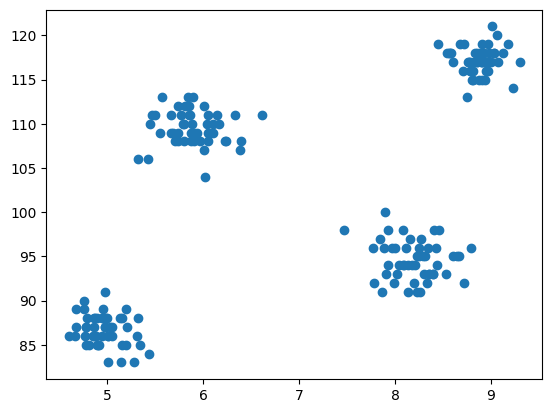

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [11]:
from sklearn.cluster import KMeans

In [12]:
WCSS = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    WCSS.append(km.inertia_)

In [13]:
WCSS

[29957.898288,
 4184.14127,
 2503.397581,
 681.9696599999999,
 514.1616803171114,
 412.22876915069065,
 326.9540379483691,
 267.23088625760363,
 266.99381386004234,
 187.05460983770234]

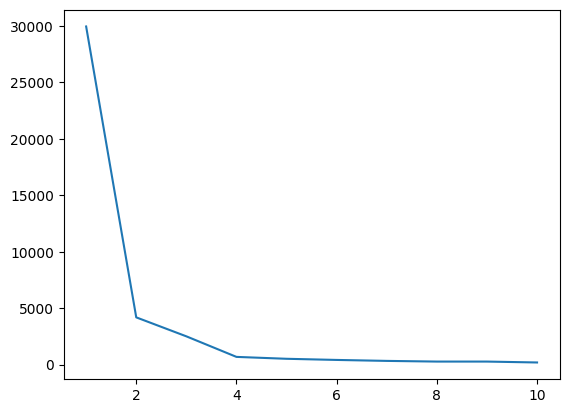

In [15]:
plt.plot(range(1,11),WCSS)

In [16]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

In [17]:
y_means

array([2, 3, 0, 0, 3, 3, 0, 1, 3, 0, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 2,
       0, 2, 2, 0, 2, 1, 0, 3, 1, 3, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 0, 2,
       1, 1, 0, 3, 1, 3, 2, 2, 1, 0, 1, 3, 3, 1, 3, 1, 3, 0, 0, 1, 2, 1,
       0, 2, 3, 0, 3, 1, 0, 2, 3, 1, 3, 1, 2, 0, 0, 1, 3, 2, 1, 2, 1, 3,
       1, 3, 1, 1, 0, 2, 0, 0, 1, 0, 2, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       0, 1, 3, 3, 0, 1, 0, 3, 1, 2, 2, 3, 0, 1, 0, 2, 0, 3, 2, 0, 0, 3,
       2, 2, 3, 1, 3, 2, 0, 0, 0, 2, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 1,
       2, 0, 3, 1, 3, 0, 2, 1, 3, 0, 1, 2, 3, 2, 2, 1, 1, 3, 1, 2, 2, 0,
       1, 3, 2, 1, 1, 3, 3, 3, 0, 2, 0, 0, 1, 3, 0, 0, 2, 2, 0, 2, 1, 3,
       3, 1])

In [18]:
X[y_means == 3,1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

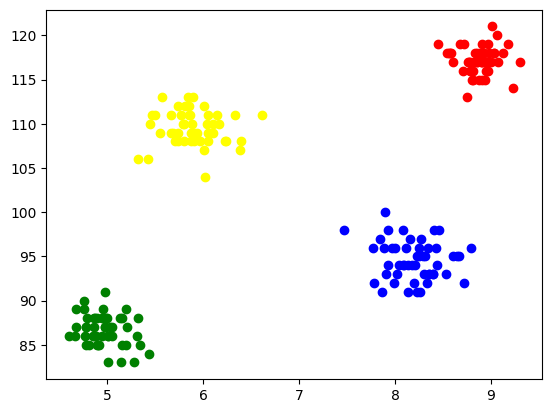

In [19]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# KMeans 3D

In [20]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [21]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [24]:
wcss = []
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

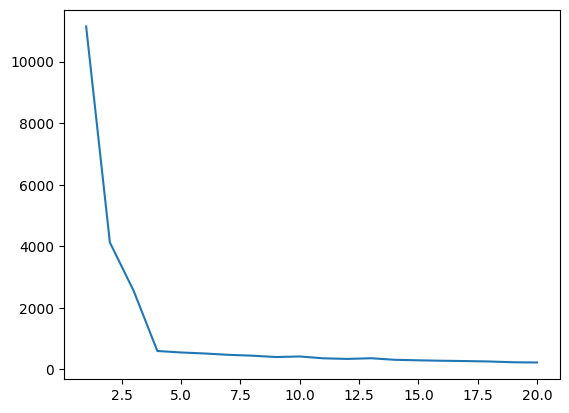

In [26]:
plt.plot(range(1,21),wcss)

In [27]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [28]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [29]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()